In [3]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from pprint import pprint

# Pull CSV Files
happiness_path = "Resources/DataPanelWHR2021C2.csv"
mortality_path = "Resources/MortalityDataWHR2021C2.csv"
regions_path = "Resources/All Countries/all.csv"

# Read CSV - Create Dataframes
happy_df = pd.read_csv(happiness_path, parse_dates=['year'])
happy_df.head()
regions_df = pd.read_csv(regions_path)
regions_df = regions_df.rename(columns={'name': 'Country name'}) 
happy_region_df =  pd.merge(happy_df, regions_df,
                                 how='left', on='Country name')

# Display the data table for preview
happy_region_df.head()

happy_region_df.keys()

#clean_happy_region_df = {[

# #(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
#        'Social support', 'Healthy life expectancy at birth',
#        'Freedom to make life choices', 'Generosity',
#        'Perceptions of corruption', 'Positive affect', 'Negative affect',
#        'alpha-2', 'alpha-3', 'country-code', 'region',
#        'sub-region', 'intermediate-region', 'region-code', 'sub-region-code',
#        'intermediate-region-code'],
#       dtype='object')

sort=happy_region_df['year'].drop_duplicates()
sort.sort_values()

list_2020_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2020-01-01"])

# list_2020_countries['year'] =""
# list_2020_countries['Life Ladder'] = ""
# list_2020_countries['Log GDP per capita'] = ""
# list_2020_countries['Social support'] = ""
# list_2020_countries['Healthy life expectancy at birth'] = ""
# list_2020_countries['Freedom to make life choices', 'Generosity'] = ""
# list_2020_countries['Perceptions of corruption'] = ""
# list_2020_countries['Positive affect'] = ""
# list_2020_countries['Negative affect'] = ""
# list_2020_countries['alpha-2'] = ""
# list_2020_countries['alpha-3'] = ""
# list_2020_countries['Pcountry-code'] = ""
# list_2020_countries['region'] = "" 
# list_2020_countries['sub-region'] = ""                     
# list_2020_countries['intermediate-region'] = ""
# list_2020_countries['region-code'] = ""                    
# list_2020_countries['sub-region-code'] = ""
# list_2020_countries['intermediate-region-code'] = ""

list_2020_countries
list_2020_data_df =  pd.merge(list_2020_countries, happy_region_df,
                                 how='left', on='Country name')
list_2020_data_df
list_2011_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2011-01-01"])
list_2011_countries
list_2011_data =  pd.merge(list_2011_countries, list_2020_data_df,
                                 how='left', on='Country name')
list_2013_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2013-01-01"])
list_2013_countries
list_2013_data =  pd.merge(list_2013_countries, list_2011_data,
                                 how='left', on='Country name')
list_2019_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2019-01-01"])
list_2019_countries
list_2019_data =  pd.merge(list_2019_countries, list_2013_data,
                                 how='left', on='Country name')
list_2014_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2014-01-01"])
list_2014_countries
list_2014_data =  pd.merge(list_2014_countries, list_2019_data,
                                 how='left', on='Country name')
list_2018_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2018-01-01"])
list_2018_countries
final_data_df =  pd.merge(list_2018_countries, list_2014_data,
                                 how='left', on='Country name')
# # list_2011_count
final_data_df = final_data_df.loc[final_data_df["year"] > '2010-01-01']
# final_data_df = final_data_df['year'].value_counts()
# final_data_df.sort_values()
final_data_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
4,Albania,2011-01-01,5.867,9.331,0.759,66.68,0.487,-0.205,0.877,0.628,...,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
5,Albania,2012-01-01,5.510,9.347,0.785,66.96,0.602,-0.169,0.848,0.607,...,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
6,Albania,2013-01-01,4.551,9.359,0.759,67.24,0.632,-0.127,0.863,0.634,...,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
7,Albania,2014-01-01,4.814,9.378,0.626,67.52,0.735,-0.025,0.883,0.685,...,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
8,Albania,2015-01-01,4.607,9.403,0.639,67.80,0.704,-0.081,0.885,0.688,...,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Zimbabwe,2016-01-01,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,...,ZW,ZWE,716.0,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
1201,Zimbabwe,2017-01-01,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,...,ZW,ZWE,716.0,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
1202,Zimbabwe,2018-01-01,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,...,ZW,ZWE,716.0,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
1203,Zimbabwe,2019-01-01,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,...,ZW,ZWE,716.0,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
12,Albania,2019-01-01,4.995,9.544,0.686,69.0,0.777,-0.099,0.914,0.681,...,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
28,Argentina,2019-01-01,6.086,10.000,0.896,69.0,0.817,-0.211,0.830,0.826,...,AR,ARG,32.0,ISO 3166-2:AR,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
43,Australia,2019-01-01,7.234,10.815,0.943,73.9,0.918,0.121,0.430,0.770,...,AU,AUS,36.0,ISO 3166-2:AU,Oceania,Australia and New Zealand,NaN,9.0,53.0,NaN
56,Austria,2019-01-01,7.195,10.939,0.964,73.3,0.903,0.060,0.457,0.774,...,AT,AUT,40.0,ISO 3166-2:AT,Europe,Western Europe,NaN,150.0,155.0,NaN
72,Bangladesh,2019-01-01,5.114,8.467,0.673,64.8,0.902,-0.051,0.656,0.537,...,BD,BGD,50.0,ISO 3166-2:BD,Asia,Southern Asia,NaN,142.0,34.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,United States,2019-01-01,6.944,11.043,0.917,68.2,0.836,0.144,0.707,0.815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1156,Uruguay,2019-01-01,6.600,9.979,0.933,69.1,0.903,-0.095,0.599,0.889,...,UY,URY,858.0,ISO 3166-2:UY,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
1172,Venezuela,2019-01-01,5.081,NaN,0.888,66.7,0.626,NaN,0.839,0.761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1188,Zambia,2019-01-01,3.307,8.155,0.638,55.8,0.811,0.077,0.832,0.743,...,ZM,ZMB,894.0,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


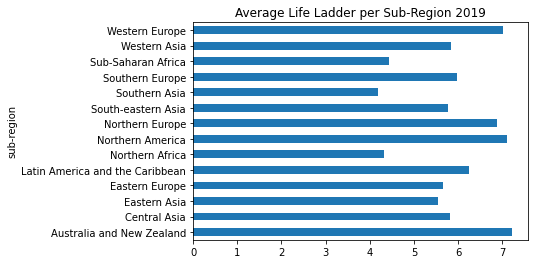

In [4]:
# Average Life Ladder per Sub-Region over time 
# sub_regions = final_data_df['sub-region'].dropna()
# xvals = sub_regions.dropna().unique()
data2019 = final_data_df[final_data_df.year == '2019-01-01']
data2019
avgs = data2019.groupby('sub-region').mean()['Life Ladder']
# df1 = pd.DataFrame({'Sub-Regions': xvals, 'Avg Life Ladder': yvals})
ax = avgs.plot.barh(title = 'Average Life Ladder per Sub-Region 2019')
ax.figure.savefig("LifeLaddervsSubRegion2019.png", bbox_inches='tight')
data2019

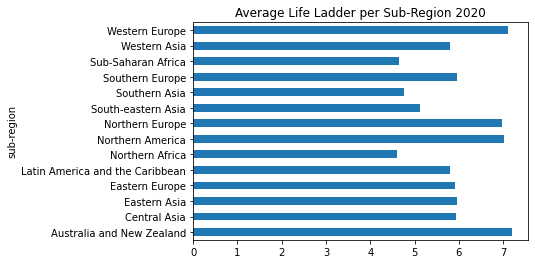

In [5]:
# Just year 2020
df = final_data_df.loc[final_data_df['year'] == '2020-01-01']
#sub_regions = final_data_df['sub-region'].dropna()
#xvals = sub_regions.unique()
avgs20 = df.groupby('sub-region').mean()['Life Ladder']
#df1 = pd.DataFrame({'Sub-Regions': xvals, 'Avg Life Ladder': yvals2020})
ax = avgs20.plot.barh(title = 'Average Life Ladder per Sub-Region 2020')
ax.figure.savefig("LifeLaddervsSubRegion2020.png", bbox_inches='tight')

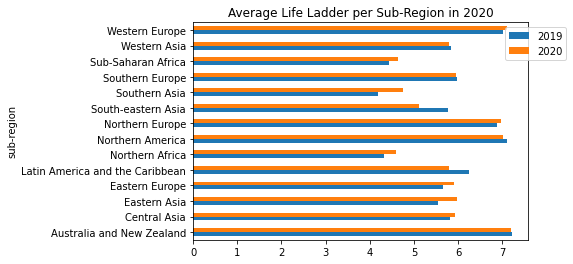

In [6]:
# Just year 2020
df = final_data_df.loc[final_data_df['year'] == '2020-01-01']
#sub_regions = final_data_df['sub-region'].dropna()
#xvals = sub_regions.unique()
avgs20 = df.groupby('sub-region').mean()['Life Ladder']
#df1 = pd.DataFrame({'Sub-Regions': xvals, 'Avg Life Ladder': yvals2020})
# ax = avgs20.plot.barh(title = 'Average Life Ladder per Sub-Region in 2020').get_figure().savefig('2020AvgLifeLadder.png', bbox_inches='tight')
df2 = pd.merge(avgs, avgs20, on = "sub-region")

df2.plot.barh
df2.plot.barh(title = 'Average Life Ladder per Sub-Region in 2020').legend(['2019', '2020'], bbox_to_anchor=(1.13, 1), loc='upper right').get_figure().savefig('2019-2020AvgLifeLadder.png', bbox_inches='tight')

0.05450583900226734

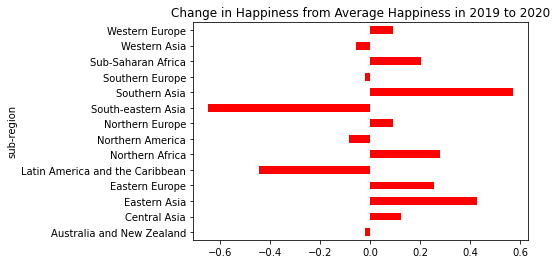

In [9]:
# Changes between avg over years and 2020
difference = avgs20.subtract(avgs) 
#xvals = sub_regions.unique()
#df1 = pd.DataFrame({'Sub-Regions': xvals, 'Difference from AVG in 2020': difference})
ax = difference.plot.barh(title = 'Change in Happiness from Average Happiness in 2019 to 2020', color = 'red')
ax.figure.savefig("LifeLaddervsSubRegionChanges.png", bbox_inches='tight')
np.mean(difference)

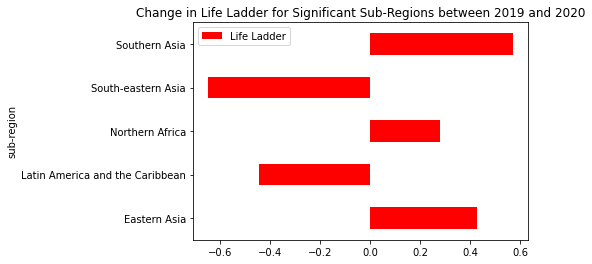

In [8]:
x = difference.reset_index()
y = x.loc[x['sub-region'].isin(['Southern Asia', 'South-eastern Asia', 'Northern Africa', 'Latin America and the Caribbean', 'Eastern Asia'])]
y
ax = y.plot(x = 'sub-region', y = 'Life Ladder', kind = 'barh', title = "Change in Life Ladder for Significant Sub-Regions between 2019 and 2020", color = 'red', ylabel = 'Change in Life Ladder')
ax.figure.savefig("SignificantLifeLaddervsSubRegionChanges.png", bbox_inches='tight')

In [60]:
# for biggest change sub-regions
data2019 = final_data_df[final_data_df.year == '2019-01-01']
data2020 = final_data_df[final_data_df.year == '2020-01-01']
ss19 = data2019.groupby('sub-region').mean()['Social support']
ss20 = data2020.groupby('sub-region').mean()['Social support']
x = pd.merge(ss19, ss20, on = 'sub-region')
x.reset_index(inplace = True)
y = x.loc[x['sub-region'].isin(['Southern Asia', 'South-eastern Asia', 'Northern Africa', 'Latin America and the Caribbean', 'Eastern Asia'])]
y
# y.plot(kind='barh',x='Social support_x, ',y='num_children')
# df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

# plt.show()
# # ax = y['Social support_x', 'Social support_y'].plot(kind = 'barh')

# plt.title('Social Support after 2020')
# plt.legend(['2019', '2020'], bbox_to_anchor=(1, 1), loc='upper left')
# # ax.figure.savefig("LifeLaddervsSubRegionChanges.png", bbox_inches='tight')

,sub-region,Social support_x,Social support_y
2,Eastern Asia,0.882000,0.871000
4,Latin America and the Caribbean,0.864222,0.824333
5,Northern Africa,0.691000,0.696000
8,South-eastern Asia,0.835667,0.790667
9,Southern Asia,0.617000,0.678000


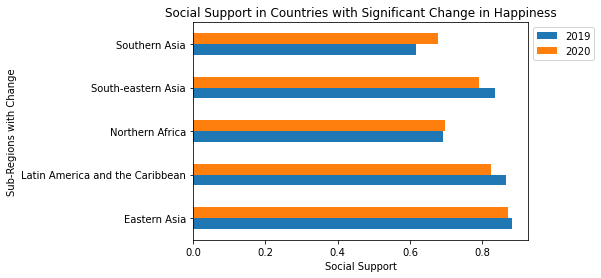

In [62]:
df2 = y.plot(title = 'Social Support in Countries with Significant Change in Happiness', kind='barh',y=['Social support_x','Social support_y'], x = 'sub-region')
plt.legend(['2019', '2020'], bbox_to_anchor=(1, 1), loc='upper left')
df2.set_xlabel('Social Support')
df2.set_ylabel('Sub-Regions with Change')
df2.figure.savefig("SS.png", bbox_inches='tight')
# df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

# plt.show()
# # ax = y['Social support_x', 'Social support_y'].plot(kind = 'barh')

# plt.title('Social Support after 2020')
# plt.legend(['2019', '2020'], bbox_to_anchor=(1, 1), loc='upper left')
# # ax.figure.savefig("LifeLaddervsSubRegionChanges.png", bbox_inches='tight')

In [63]:
data2019 = final_data_df[final_data_df.year == '2019-01-01']
data2020 = final_data_df[final_data_df.year == '2020-01-01']
ss19 = data2019.groupby('sub-region').mean()['Perceptions of corruption']
ss20 = data2020.groupby('sub-region').mean()['Perceptions of corruption']
x = pd.merge(ss19, ss20, on = 'sub-region')
x.reset_index(inplace = True)
y = x.loc[x['sub-region'].isin(['Southern Asia', 'South-eastern Asia', 'Northern Africa', 'Latin America and the Caribbean', 'Eastern Asia'])]

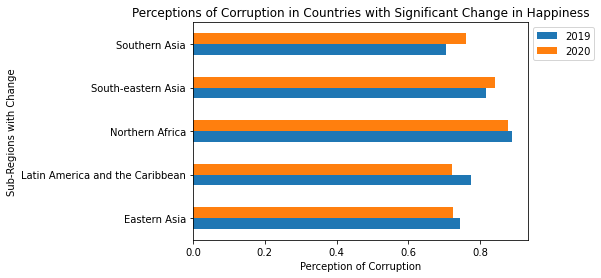

In [64]:
df2 = y.plot(title = 'Perceptions of Corruption in Countries with Significant Change in Happiness', kind='barh',y=['Perceptions of corruption_x','Perceptions of corruption_y'], x = 'sub-region')
plt.legend(['2019', '2020'], bbox_to_anchor=(1, 1), loc='upper left')
df2.set_xlabel('Perception of Corruption')
df2.set_ylabel('Sub-Regions with Change')
df2.figure.savefig("Corruption.png", bbox_inches='tight')

In [65]:
data2019 = final_data_df[final_data_df.year == '2019-01-01']
data2020 = final_data_df[final_data_df.year == '2020-01-01']
ss19 = data2019.groupby('sub-region').mean()['Freedom to make life choices']
ss20 = data2020.groupby('sub-region').mean()['Freedom to make life choices']
x = pd.merge(ss19, ss20, on = 'sub-region')
x.reset_index(inplace = True)
y = x.loc[x['sub-region'].isin(['Southern Asia', 'South-eastern Asia', 'Northern Africa', 'Latin America and the Caribbean', 'Eastern Asia'])]

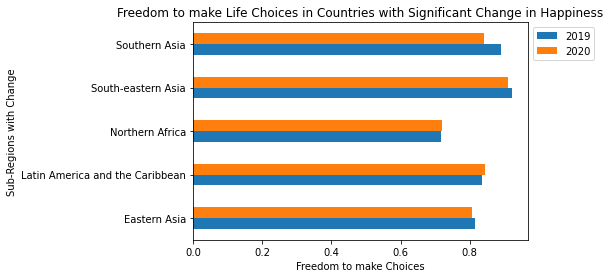

In [66]:
df2 = y.plot(title = 'Freedom to make Life Choices in Countries with Significant Change in Happiness', kind='barh',y=['Freedom to make life choices_x','Freedom to make life choices_y'], x = 'sub-region')
plt.legend(['2019', '2020'], bbox_to_anchor=(1, 1), loc='upper left')
df2.set_xlabel('Freedom to make Choices')
df2.set_ylabel('Sub-Regions with Change')
df2.figure.savefig("Freedom.png", bbox_inches='tight')

In [67]:
data2019 = final_data_df[final_data_df.year == '2019-01-01']
data2020 = final_data_df[final_data_df.year == '2020-01-01']
ss19 = data2019.groupby('sub-region').mean()['Log GDP per capita']
ss20 = data2020.groupby('sub-region').mean()['Log GDP per capita']
x = pd.merge(ss19, ss20, on = 'sub-region')
x.reset_index(inplace = True)
y = x.loc[x['sub-region'].isin(['Southern Asia', 'South-eastern Asia', 'Northern Africa', 'Latin America and the Caribbean', 'Eastern Asia'])]

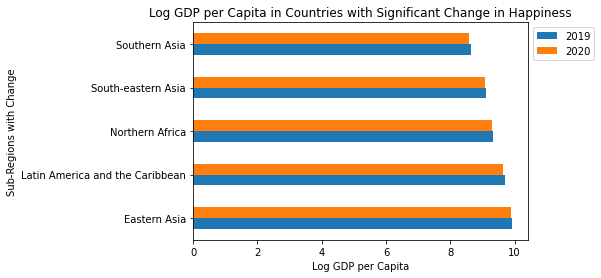

In [68]:
df2 = y.plot(title = 'Log GDP per Capita in Countries with Significant Change in Happiness', kind='barh',y=['Log GDP per capita_x','Log GDP per capita_y'], x = 'sub-region')
plt.legend(['2019', '2020'], bbox_to_anchor=(1, 1), loc='upper left')
df2.set_xlabel('Log GDP per Capita')
df2.set_ylabel('Sub-Regions with Change')
df2.figure.savefig("GDP.png", bbox_inches='tight')

In [69]:
data2019 = final_data_df[final_data_df.year == '2019-01-01']
data2020 = final_data_df[final_data_df.year == '2020-01-01']
ss19 = data2019.groupby('sub-region').mean()['Healthy life expectancy at birth']
ss20 = data2020.groupby('sub-region').mean()['Healthy life expectancy at birth']
x = pd.merge(ss19, ss20, on = 'sub-region')
x.reset_index(inplace = True)
y = x.loc[x['sub-region'].isin(['Southern Asia', 'South-eastern Asia', 'Northern Africa', 'Latin America and the Caribbean', 'Eastern Asia'])]

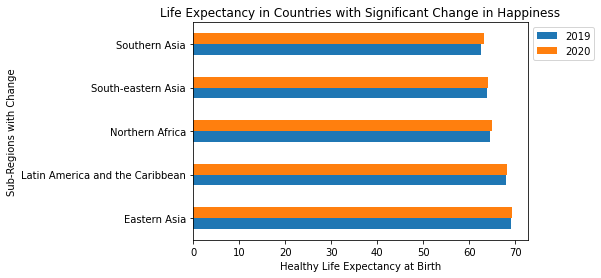

In [70]:
df2 = y.plot(title = 'Life Expectancy in Countries with Significant Change in Happiness', kind='barh',y=['Healthy life expectancy at birth_x','Healthy life expectancy at birth_y'], x = 'sub-region')
plt.legend(['2019', '2020'], bbox_to_anchor=(1, 1), loc='upper left')
df2.set_xlabel('Healthy Life Expectancy at Birth')
df2.set_ylabel('Sub-Regions with Change')
df2.figure.savefig("GDP.png", bbox_inches='tight')

In [71]:
data2019 = final_data_df[final_data_df.year == '2019-01-01']
data2020 = final_data_df[final_data_df.year == '2020-01-01']
ss19 = data2019.groupby('sub-region').mean()['Generosity']
ss20 = data2020.groupby('sub-region').mean()['Generosity']
x = pd.merge(ss19, ss20, on = 'sub-region')
x.reset_index(inplace = True)
y = x.loc[x['sub-region'].isin(['Southern Asia', 'South-eastern Asia', 'Northern Africa', 'Latin America and the Caribbean', 'Eastern Asia'])]

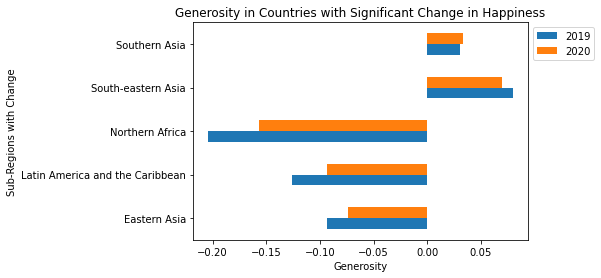

In [72]:
df2 = y.plot(title = 'Generosity in Countries with Significant Change in Happiness', kind='barh',y=['Generosity_x','Generosity_y'], x = 'sub-region')
plt.legend(['2019', '2020'], bbox_to_anchor=(1, 1), loc='upper left')
df2.set_xlabel('Generosity')
df2.set_ylabel('Sub-Regions with Change')
df2.figure.savefig("GDP.png", bbox_inches='tight')

In [ ]:
happier = []
sadder = []

for row in difference.iteritems():
    if row[1] > 0:
        happier.append(row[0])
    else:
        sadder.append(row[0])
print(f'The Sub-Regions that were\033[1m happier\033[0m than average in 2020 are: {happier}\n\nThe Sub-Regions that were\033[1m more sad\033[0m are: {sadder}')

In [ ]:
happier_regions = data2019.loc[data2019['sub-region'].isin(happier)].groupby('sub-region').mean().drop(columns = ['Life Ladder','Healthy life expectancy at birth','Positive affect','Negative affect','country-code','region-code','sub-region-code','intermediate-region-code'])
happier_regions2020 = df.loc[df['sub-region'].isin(happier)].groupby('sub-region').mean().drop(columns = ['Life Ladder','Healthy life expectancy at birth','Positive affect','Negative affect','country-code','region-code','sub-region-code','intermediate-region-code'])
sadder_regions = data2019.loc[data2019['sub-region'].isin(sadder)].groupby('sub-region').mean().drop(columns = ['Life Ladder','Healthy life expectancy at birth','Positive affect','Negative affect','country-code','region-code','sub-region-code','intermediate-region-code'])
sadder_regions2020 = df.loc[df['sub-region'].isin(sadder)].groupby('sub-region').mean().drop(columns = ['Life Ladder','Healthy life expectancy at birth','Positive affect','Negative affect','country-code','region-code','sub-region-code','intermediate-region-code'])

In [ ]:
matplotlib.rcParams['figure.figsize'] = [10, 10]

In [ ]:
plt.figure(figsize = (8,8))
fig, axes = plt.subplots(nrows = 2, ncols = 1)

plt.title('Social Support in Happier Regions after 2020')
happier_regions_df = pd.merge(happier_regions, happier_regions2020, on = 'sub-region')
happier_regions_df[['Social support_x', 'Social support_y']].plot(ax=axes[0], kind = 'barh').set_title('Social Support in Happier Regions after 2020')
happier_regions_df[['Social support_x', 'Social support_y']].plot(ax=axes[0], kind = 'barh').legend(['2020', '2019'], bbox_to_anchor=(1.15, 1), loc='upper right')

#plt.legend(['Average Social Support 2020', 'Average Social Support 2019'], bbox_to_anchor=(1.05, 1), loc='upper left')

sadder_regions_df = pd.merge(sadder_regions, sadder_regions2020, on = 'sub-region')
sadder_regions_df[['Social support_x', 'Social support_y']].plot(ax=axes[1], kind = 'barh', color = ['green','red'])
plt.title('Social Support in Sadder Regions after 2020')
plt.legend(['2019', '2020'], bbox_to_anchor=(1, 1), loc='upper left')

plt.show()
fig.savefig("SocialSupportSubRegions.png", bbox_inches='tight')

In [ ]:
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.figure(figsize = (8,8))
fig, axes = plt.subplots(nrows = 2, ncols = 1)

happier_regions_df[['Freedom to make life choices_x', 'Freedom to make life choices_y']].plot(ax=axes[0], kind = 'barh').set_title('Freedom to Make Life Choices in Happier Regions after 2020')
happier_regions_df[['Freedom to make life choices_x', 'Freedom to make life choices_y']].plot(ax=axes[0], kind = 'barh').legend(['2020', '2019'], bbox_to_anchor=(1.15, 1), loc='upper right')

sadder_regions_df[['Freedom to make life choices_x', 'Freedom to make life choices_y']].plot(ax=axes[1], kind = 'barh', color = ['green','red'])
plt.title('Freedom to make life choices in Sadder Regions after 2020')
plt.legend(['2019', '2020'], bbox_to_anchor=(1, 1), loc='upper left')

plt.show()
fig.savefig("FreedomSubRegions.png", bbox_inches='tight')

In [ ]:
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.figure(figsize = (8,8))
fig, axes = plt.subplots(nrows = 2, ncols = 1)

happier_regions_df[['Log GDP per capita_x', 'Log GDP per capita_y']].plot(ax=axes[0], kind = 'barh').set_title('Log GDP Per Capita in Happier Regions after 2020')
happier_regions_df[['Log GDP per capita_x', 'Log GDP per capita_y']].plot(ax=axes[0], kind = 'barh').legend(['2020', '2019'], bbox_to_anchor=(1.15, 1), loc='upper right')

sadder_regions_df[['Log GDP per capita_x', 'Log GDP per capita_y']].plot(ax=axes[1], kind = 'barh', color = ['green','red'])
plt.title('Log GDP per Capita in Sadder Regions after 2020')
plt.legend(['2019', '2020'], bbox_to_anchor=(1, 1), loc='upper left')

plt.show()
fig.savefig("GDPSubRegions.png", bbox_inches='tight')

In [ ]:
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.figure(figsize = (8,8))
fig, axes = plt.subplots(nrows = 2, ncols = 1)

happier_regions_df[['Perceptions of corruption_x', 'Perceptions of corruption_y']].plot(ax=axes[0], kind = 'barh').set_title('Perceptions of Corruption in Happier Regions after 2020')
happier_regions_df[['Perceptions of corruption_x', 'Perceptions of corruption_y']].plot(ax=axes[0], kind = 'barh').legend(['2020', '2019'], bbox_to_anchor=(1.15, 1), loc='upper right')

sadder_regions_df[['Perceptions of corruption_x', 'Perceptions of corruption_y']].plot(ax=axes[1], kind = 'barh', color = ['green','red'])
plt.title('Perceptions of Corruption in Sadder Regions after 2020')
plt.legend(['2019', '2020'], bbox_to_anchor=(1, 1), loc='upper left')

plt.show()
fig.savefig("CorruptionSubRegions.png", bbox_inches='tight')

In [ ]:
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.figure(figsize = (8,8))
fig, axes = plt.subplots(nrows = 2, ncols = 1)

happier_regions_df[['Generosity_x', 'Generosity_y']].plot(ax=axes[0], kind = 'barh').set_title('Generosity in Happier Regions after 2020')
happier_regions_df[['Generosity_x', 'Generosity_y']].plot(ax=axes[0], kind = 'barh').legend(['2019', '2020'], bbox_to_anchor=(1.15, 1), loc='upper right')

sadder_regions_df[['Generosity_x', 'Generosity_y']].plot(ax=axes[1], kind = 'barh', color = ['green','red'])
plt.title('Generosity in Sadder Regions after 2020')
plt.legend(['2019', '2020'], bbox_to_anchor=(1, 1), loc='upper left')

plt.show()
fig.savefig("GenerositySubRegions.png", bbox_inches='tight')